In [2]:
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from subprocess import check_call

In [3]:
# 트리 시각화를 위한 모듈 import
!pip install pydot

import pydot
from IPython.core.display import Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
iris = load_iris()
x = iris.data[:,2:] 
y = iris.target

In [5]:
print(f" X features -> {iris.feature_names} \n target class -> {iris.target_names} ")

 X features -> ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 
 target class -> ['setosa' 'versicolor' 'virginica'] 


In [6]:
# 과제[1] 무엇과 무엇을 x 와 y로 설정한 것같나요? 
# x : 꽃잎 꽃받침 아무튼 길이 정보 
# y : 붓꽃 종

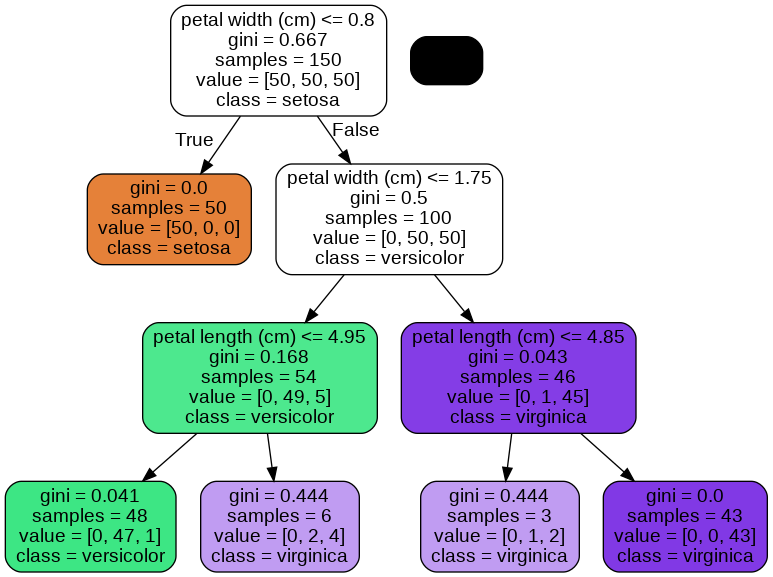

In [7]:
# 과제 [2] decision tree 모형 인스턴스 생성 및 하이퍼파라미터(depth) = 3
from sklearn import tree
tree_model =  tree.DecisionTreeClassifier(max_depth = 3) #하이퍼파라미터
# 모델을 피팅해보세요 
tree_model.fit(x,y)

# 출력해보세요 
dot_data = export_graphviz(
    tree_model, # 학습한 모형
    out_file = None, # .dot 파일 저장 위치
    feature_names = iris.feature_names[2:], # 사용한 변수 이름
    class_names = iris.target_names, # 예측할 타겟 클래스 이름
    rounded=True, # 사각형 끝을 둥글게
    filled=True # 사각형 안 색깔 채우기
)
graph = pydot.graph_from_dot_data(dot_data)[0]
image = graph.create_png()
Image(image)

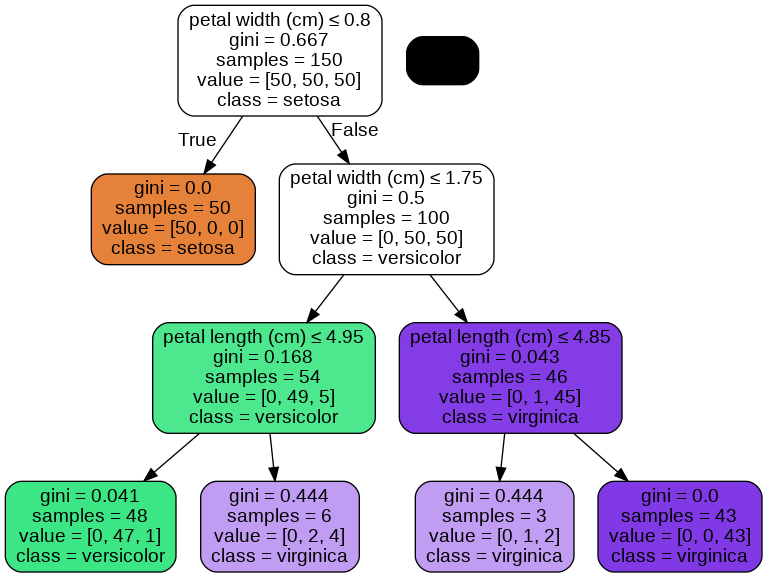

In [8]:
# 함수로 만듦
def draw_decision_tree(clf, feature_names = None, class_names = None):
    dot_data = export_graphviz(clf, out_file = None, 
                                feature_names = feature_names,
                                class_names = class_names,
                                filled = True, 
                                rounded = True,
                                special_characters = True)
    graph = pydot.graph_from_dot_data(dot_data)[0]
    image = graph.create_png()
    return Image(image)

draw_decision_tree(tree_model,iris.feature_names[2:], iris.target_names )

In [9]:
#[과제3] 학습시킨 모델에서 길이가 3.1, 너비가 2 인 데이터는 어떤 클래스로 분류될지 확률값을 구해보세요 

tree_model.predict_proba([[3.1,2]])

array([[0.        , 0.33333333, 0.66666667]])

In [10]:
from sklearn.datasets import load_breast_cancer # 유방암 데이터셋

X, y = load_breast_cancer(return_X_y=True)
feature_names = load_breast_cancer().feature_names
class_names = load_breast_cancer().target_names

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0) 

In [12]:
tree_not_tuned= DecisionTreeClassifier(random_state=0)

# 과제[4] 학습데이터셋에만 피팅시켜봅시다
tree_not_tuned.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [13]:
from sklearn.model_selection import cross_validate
import numpy as np
scoring = ['f1','precision','recall']

#과제 [5] 학습 데이터에 대해 교차검증하세요) 

tree_scores = cross_validate(tree_not_tuned, X_train, y_train,scoring=scoring)

print("parameter가 tuning 되지 않았을 때의 F1 Score : {:.3f}".format(np.mean(tree_scores['test_f1'])))

parameter가 tuning 되지 않았을 때의 F1 Score : 0.923


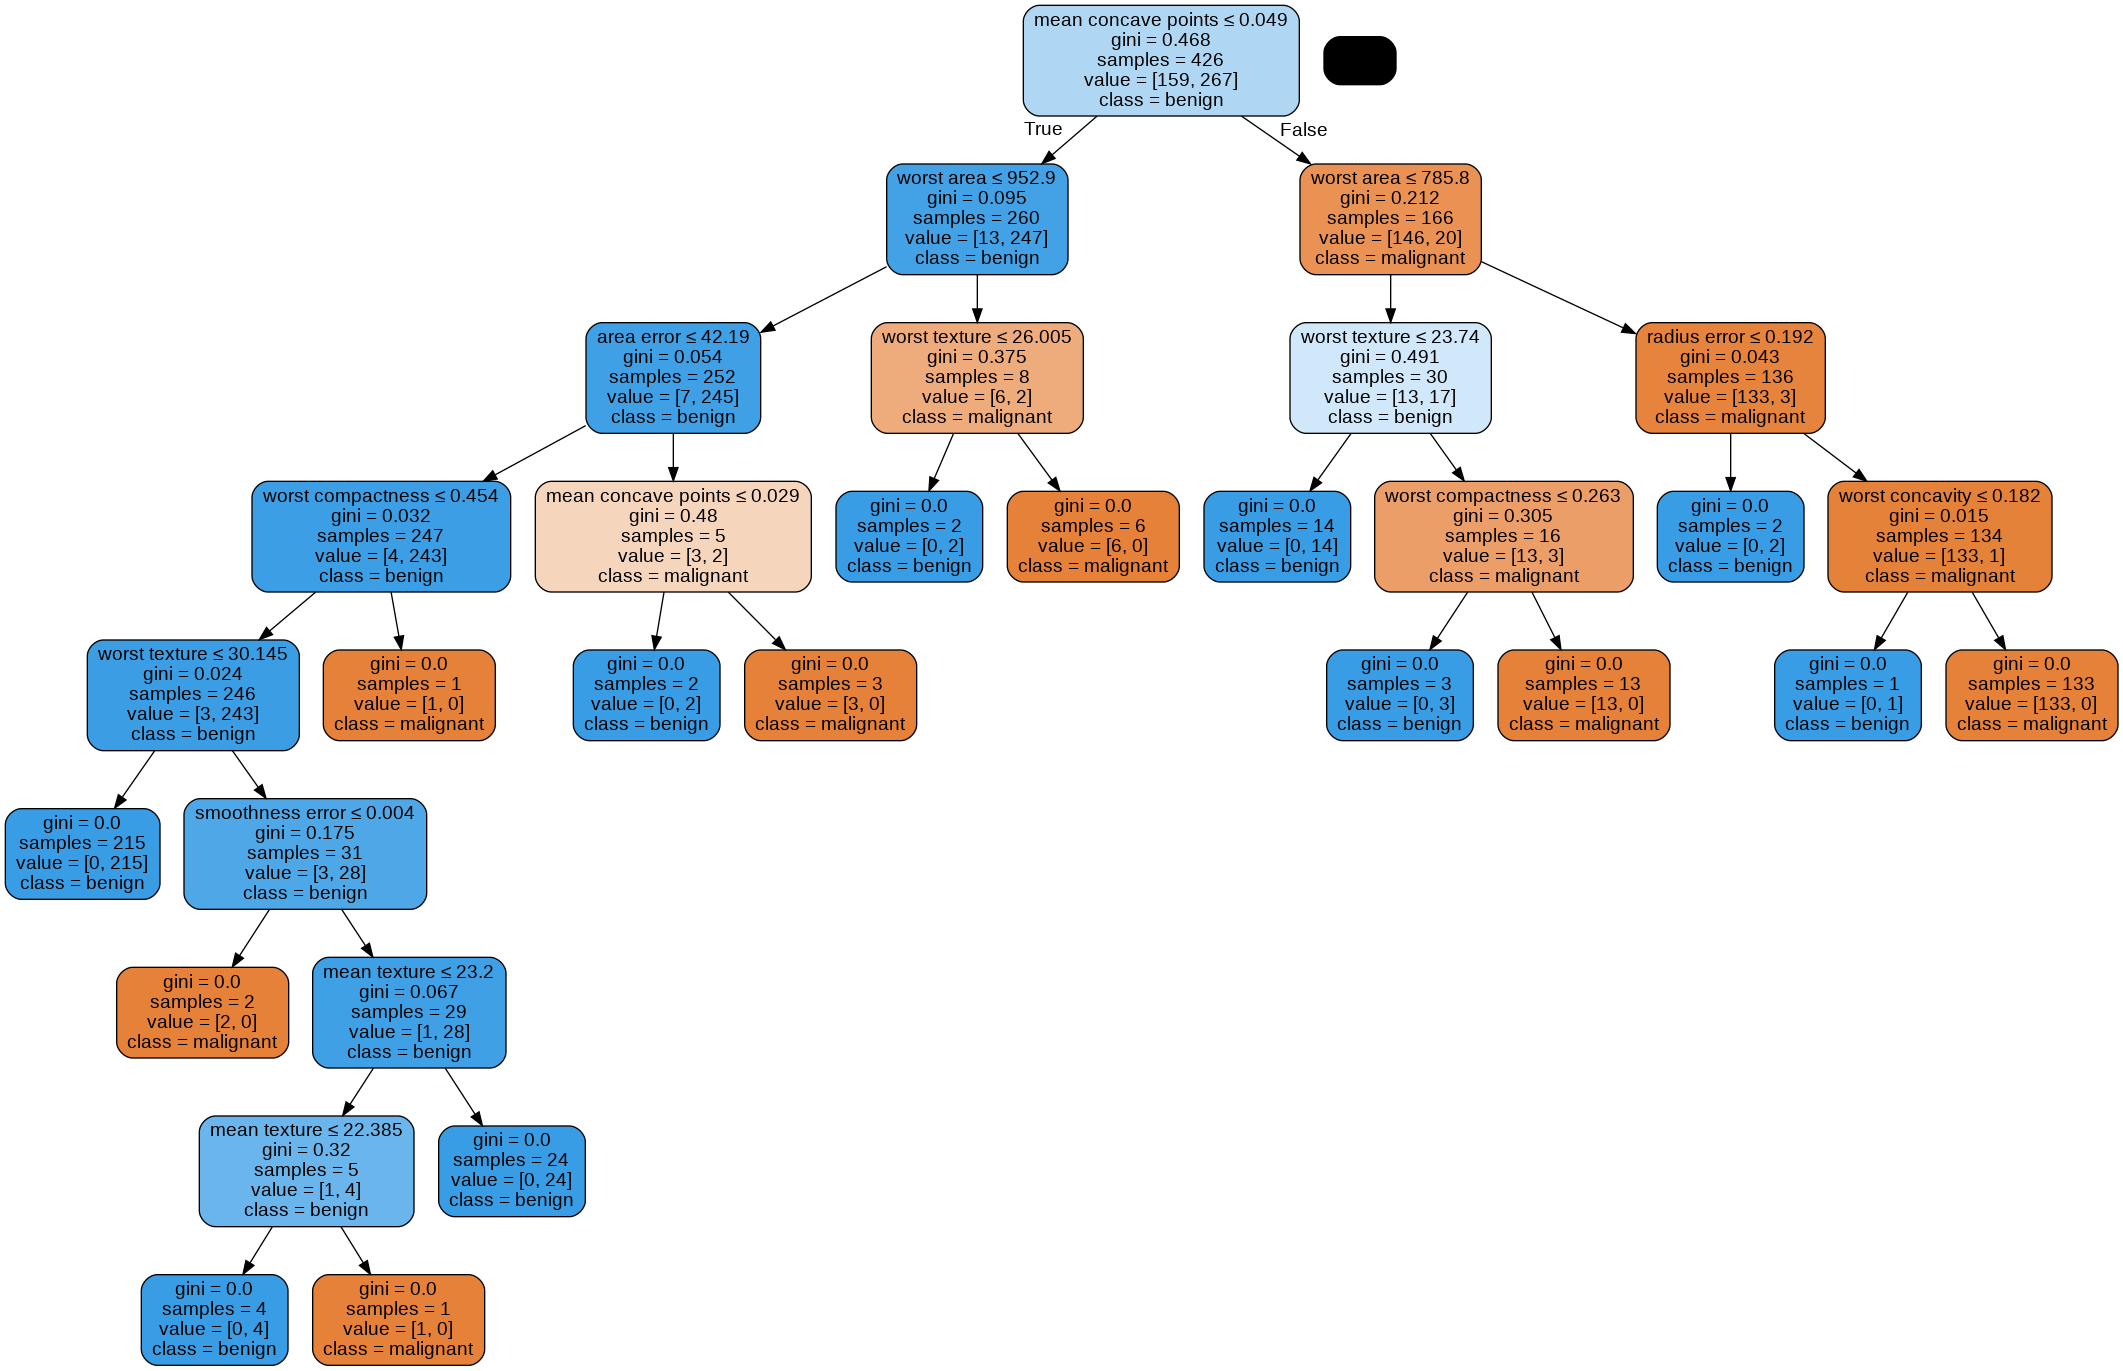

In [14]:
draw_decision_tree(tree_not_tuned ,feature_names, class_names )

In [15]:
#과제 [6] 어떻게 가지치기를 진행할 지 스스로 계획을 세우고 gridsearch를 통해 파라미터를 조정하여 다시  f1 score 를 구해봅시다! 
from sklearn.model_selection import GridSearchCV

param = {
    'min_samples_leaf':[2,3,4,5],
    'max_depth':[1,2,3,4],
    'min_samples_split':[2,3,5,7]
}
tree_tuned = DecisionTreeClassifier() 
search = GridSearchCV(tree_tuned, param_grid = param,error_score='raise')

search.fit(X_train,y_train)
tree_tuned = search.best_estimator_
print(search.best_score_)
print(search.best_params_)

#했습니다

0.9247606019151846
{'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 7}


In [16]:
#과제 [7] 다시 모델의 f1스코어를 비교해보세요 
tree_tuned = DecisionTreeClassifier(max_depth=4, min_samples_split=7, min_samples_leaf=3)
tree_tuned_scores = cross_validate(tree_tuned, X_train, y_train, scoring=scoring, cv=5, return_train_score = False)

print("Tree parameter after hyperparameter tuning - F1 Score : {:.3f}".format(np.mean(tree_tuned_scores['test_f1'])))

Tree parameter after hyperparameter tuning - F1 Score : 0.937


In [17]:
#과제[8] 결과 : 로딩이 오래 걸릴까봐 범위를 작게해서 했다. 아쉬웠다. 그래서 그런지 스코어가 너무 적게 올랐다. 

앙상블모델

In [18]:
델iris = load_iris()
X = iris.data[:,2:] # 꽃잎의 길이, 너비
Y = iris.target

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=2021,shuffle=True)

In [19]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
# 모델 선정하여 

In [20]:
# 데이터셋 로드
iris = load_iris()
X = iris.data[:,2:] # 꽃잎의 길이, 너비
Y = iris.target
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=2021,shuffle=True)

# 약한 학습기 구축
log_model = LogisticRegression() # 로지스틱회귀
rnd_model = RandomForestClassifier() #랜덤포레스트분류
svm_model = SVC() # 서포트벡터머신 
#밑에 약한학습기를 더 추가해보세요  import 하신후! 
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
ada_model = AdaBoostClassifier()
xgb_model = XGBClassifier()
gbc_model = GradientBoostingClassifier()

In [21]:
voting_model = VotingClassifier(
    estimators=[('lr',log_model),('rf',rnd_model),('svc',svm_model),('ada',ada_model) ], # 3개의 약한 학습기 외 한 개 더 추가해보세요 
    voting='hard' # 직접 투표(hard voting)
)

In [22]:
# 앙상블 모델 학습
voting_model.fit(x_train,y_train)


# 모델 비교
for model in (log_model,rnd_model,svm_model,voting_model) : 
  model.fit(x_train,y_train) #각각의 모델에 대하여 트레인 데이터 피팅 
  y_pred = model.predict(x_test)  # 예측값 
  print(model.__class__.__name__," : ",accuracy_score(y_test,y_pred))

LogisticRegression  :  1.0
RandomForestClassifier  :  0.9333333333333333
SVC  :  1.0
VotingClassifier  :  0.9333333333333333


내용정리과제

In [23]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

# 모델 구축
# BaggingClassifier에서 사용한 분류기가 클래스 확률추정(predict_proba)이 가능하면 자동으로 간접 투표 사용 
bag_model = BaggingClassifier(
    DecisionTreeClassifier(), # 약한 학습기(결정 트리)
    n_estimators=500, # 약한 학습기(결정 트리) 500개 생성
    max_samples=0.05, # 0.0~1.0 사이 실수 선택(실수 x 샘플 수) 혹은 샘플수 지정
    bootstrap=True, # True : 배깅, False : 페이스팅
    n_jobs=-1 # 훈련과 예측에 사용할 CPU 코어 수 (-1 : 가용한 모든 코어 사용)
)

# 모델 학습
bag_model.fit(x_train,y_train)

# 모델 예측
y_pred = bag_model.predict(x_test)

# 모델 평가
print(bag_model.__class__.__name__," : ",accuracy_score(y_test,y_pred))

BaggingClassifier  :  0.9555555555555556


In [24]:
# 모델 구축
bag_model = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators = 500,
    bootstrap = True,
    n_jobs = -1,
    oob_score = True # oob평가를 위해 True를 지정한다.
)

# 모델 학습
bag_model.fit(x_train,y_train)

# 모델 평가(oob_score_)
print('oob_score : ',bag_model.oob_score_)

# 모델 평가
y_pred = bag_model.predict(x_test)
print('test_score : ',accuracy_score(y_test,y_pred))

oob_score :  0.9523809523809523
test_score :  0.9555555555555556


In [25]:
from sklearn.ensemble import RandomForestClassifier

# 랜덤포레스트 모델 구축
rnd_model = RandomForestClassifier(
    n_estimators = 500, # 예측기 500개
    max_leaf_nodes = 16, # 자식노드의 최대 개수 
    n_jobs = -1 # CPU 코어 구동 개수
)

# 모델 학습
rnd_model.fit(x_train,y_train)

# 모델 예측
y_pred_rf = rnd_model.predict(x_test)

# 모델 평가
print("rnd_model : ",accuracy_score(y_pred_rf,y_test))


rnd_model :  0.9333333333333333


In [26]:
#데이터셋 정의
x = iris.data[:,:]
y = iris.target

# 모델 구축
rnd_model = RandomForestClassifier(
    n_estimators = 500,
    n_jobs = -1
)

# 모델 학습
rnd_model.fit(x,y)

# 특성 중요도 확인 (전체 특성 중요도 합 : 1)
for feature_name,feature_imp in zip(iris['feature_names'],rnd_model.feature_importances_):
  print(feature_name,' : ',feature_imp)

sepal length (cm)  :  0.0836818402733418
sepal width (cm)  :  0.022111986519101484
petal length (cm)  :  0.45101482363403494
petal width (cm)  :  0.44319134957352185


In [27]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# 아다부스트 모델 구축
# 아다부스트의 학습기 : Decision Tree (max_depth =1) 사용
# 학습기 개수(n_estimators) : 200개
# SAMME(Stagewise Additive Modeling using a Multiclass Exponential loss function) 알고리즘 사용
# 기본 학습기가 확률 추정(predict_proba)이 가능하면 SAMME.R 사용 -> 일반적으로 성능이 더 좋음
ada_model = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators = 200,
    algorithm = 'SAMME.R',
    learning_rate=0.5
)

# 모델 학습
ada_model.fit(x,y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=200)

ADA부스트 : 약한 분류기의 실수로 가중치를 수정해서 정확도를 높일 수 있다, 과적합이 적어 예측 성능이 저하되지 않는다.


XG부스트:병렬처리를 사용해 빠른 학습이 가능하다. 분류와 회귀가 다 가능하다. 

In [30]:
import xgboost as xgb
from xgboost import XGBClassifier,XGBRegressor
from xgboost import plot_importance, plot_tree


In [31]:
from sklearn.datasets import load_breast_cancer

cancer= load_breast_cancer()
X_train, X_test , y_train, y_test = train_test_split(cancer.data, cancer.target,test_size=0.2,random_state=100)

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test,label=y_test)

In [32]:
params = {
    'max_depth' :3 ,
    'eta' : 0.1,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',
    'early_stopping' : 100,
    }
num_rounds=400 

In [33]:
evals = [(dtrain,'train'),(dtest,'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain ,num_boost_round=num_rounds , early_stopping_rounds=100,evals=evals)

[0]	train-logloss:0.611569	eval-logloss:0.614598
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.544591	eval-logloss:0.554049
[2]	train-logloss:0.487599	eval-logloss:0.498159
[3]	train-logloss:0.436128	eval-logloss:0.448575
[4]	train-logloss:0.394106	eval-logloss:0.40558
[5]	train-logloss:0.356998	eval-logloss:0.372269
[6]	train-logloss:0.323699	eval-logloss:0.341755
[7]	train-logloss:0.294409	eval-logloss:0.316994
[8]	train-logloss:0.268226	eval-logloss:0.291992
[9]	train-logloss:0.245413	eval-logloss:0.273857
[10]	train-logloss:0.225646	eval-logloss:0.254903
[11]	train-logloss:0.207281	eval-logloss:0.238183
[12]	train-logloss:0.190893	eval-logloss:0.225766
[13]	train-logloss:0.176111	eval-logloss:0.212247
[14]	train-logloss:0.16348	eval-logloss:0.201563
[15]	train-logloss:0.151433	eval-logloss:0.192508
[16]	train-logloss:0.141237	eval-logloss:0.182921
[17]	train-l

In [34]:
predicts = xgb_model.predict(dtest)
print(np.round(predicts[:10],3))

[0.    0.916 0.013 1.    0.997 0.997 0.014 0.    0.994 0.989]


In [35]:
import matplotlib.pyplot as plt

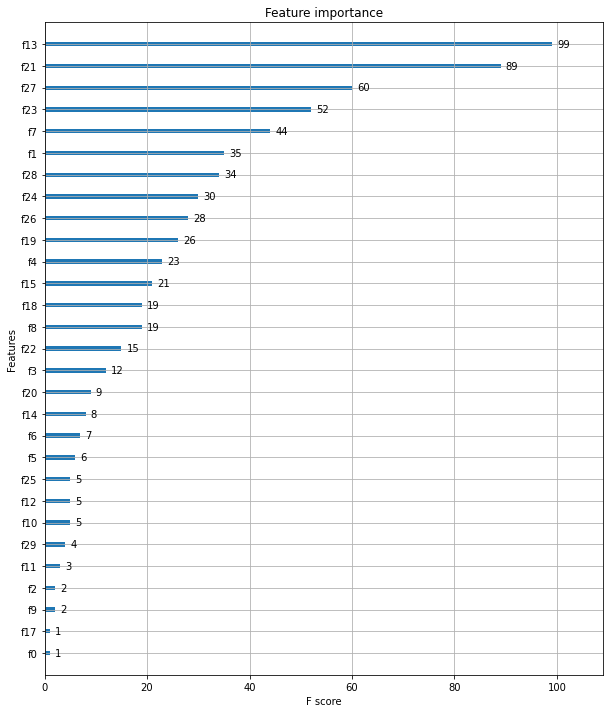

In [36]:
fig ,ax =plt.subplots(figsize=(10,12))
plot_importance(xgb_model , ax=ax)